<p><abbr title="Non enim numero hæc judicantur, sed pondere">"For these are judged not by numbers, but by weight."</abbr> <a href="https://books.google.se/books?id=7BvgAAAAMAAJ&pg=PA190&lpg=PA190&dq=%22not+by+numbers%22+cicero&source=bl&ots=Ps7ieQr9h5&sig=ACfU3U0KFnC_3x_GcDlRBkIN4-1MMsqZVQ&hl=en&sa=X&ved=2ahUKEwie7riQs8vkAhVskIsKHYROCwgQ6AEwCHoECAQQAQ#v=onepage&q=not%20by%20numbers&f=false">- Marcus Tullius Cicero, De Officiis</a></p>

# Every answer is right if the question is wrong.

## Introduction to the problem

Not so long ago my social media met a ripple of an old puzzle, that generated a lot of traffic and opinions.

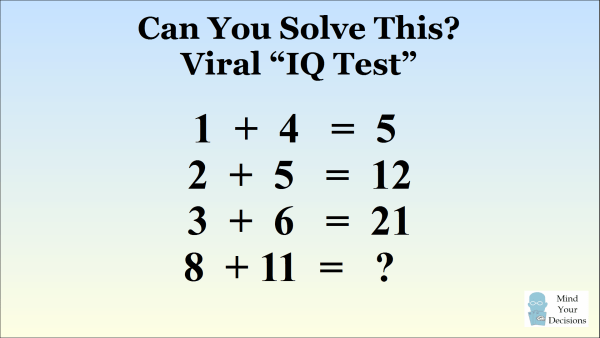

In [2]:
from IPython import display
display.display(display.Image(filename="1-4-5-puzzle-social.png"))

[Facebook](https://www.facebook.com/randall.joneslatinjuggalo/posts/1048238075247858)

[Mind your decisions](https://mindyourdecisions.com/blog/2016/08/24/the-viral-1-4-5-puzzle-the-correct-answer-explained/)

[Reddit](https://www.reddit.com/r/puzzles/comments/4gbxst/how_to_come_up_with_the_most_correct_answer_on_a/)

Let's show that we can replace the question mark with any number and then prove that it is the right solution. We should start by representing our problem in some more convenient way. For example:

$$
\begin{align}
1&+f(4) &=&\ 5\\
2&+f(5) &=&\ 12\\
3&+f(6) &=&\ 21\\
8&+f(11) &=&\ ?
\end{align}
$$

## Preparing workplace

The task we want to complete is to find $f$ that will fit all the values. We will use an XVIII century [method](https://en.wikipedia.org/wiki/Lagrange_polynomial) created by Edward Waring. The method is called Lagranges Interpolation. It should give you a clue, that if you want to make yourself a name, find different field than mathematics (there are no even Nobel prizes in it).

Before we start let's relax a little our equation by adding another variable and let's get rid of this ugly question mark.

$$
\begin{align}
y&+f(4) &=&\ 5\\
2\cdot y&+f(5) &=&\ 12\\
3\cdot y&+f(6) &=&\ 21\\
8\cdot y&+f(11) &=&\ s
\end{align}
$$

We add the $y$, because later we may want to be able to manipulate results. We can substitute the $y$ with $1$ later if we won't like it.

$$
\begin{align}
&f(4) &=&\ 5-y\\
&f(5) &=&\ 12-2\cdot y\\
&f(6) &=&\ 21-3\cdot y\\
&f(11) &=&\ s-8\cdot y
\end{align}
$$

We are looking for a third-degree polynomial, to better understand why the Lagrange interpolation works, let's write it down.

$$
\begin{align}
&f(x) &=&\ a_1\cdot(x-4)\cdot(x-5)\cdot(x-11)\ +\\
&& &\ a_2\cdot(x-4)\cdot(x-6)\cdot(x-11)\ +\\
&& &\ a_3\cdot(x-5)\cdot(x-6)\cdot(x-11)\ +\\
&& &\ a_4\cdot(x-4)\cdot(x-5)\cdot(x-6)\\
\end{align}
$$

You can see that if you take any number from $\{4,5,6,11\}$, you will get only one parameter $a_i$ in the result as the others are multiplied by $0$, i.e.

$$f(5)= 0 + a_2 \cdot 6 + 0 + 0= 6\cdot a_2$$

All calculations showed here can be solved with a <abbr title="Computer Algebra System">CAS</abbr>. I have used [SymPy](https://www.sympy.org/en/index.html) since it is built-in into [Anaconda](https://www.anaconda.com/) which  I am using to write this Jupyter notebook. This will help us eliminate simple miscalculations, and learn the basics of SymPy.

In [3]:
import numpy as np
from sympy import *

In [4]:
x, y, s, a_1, a_2, a_3, a_4  = symbols('x, y, s, a_1, a_2, a_3, a_4')

In [5]:
PolyS = "a_1*(x-4)*(x-5)*(x-11)+a_2*(x-4)*(x-6)*(x-11)+a_3*(x-5)*(x-6)*(x-11)+a_4*(x-4)*(x-5)*(x-6)"
Poly = sympify(PolyS)
f_4 = sympify("5-y")
f_5 = sympify("12-2*y")
f_6 = sympify("21-3*y")
f_11 = sympify("s-8*y")
Poly

a_1*(x - 11)*(x - 5)*(x - 4) + a_2*(x - 11)*(x - 6)*(x - 4) + a_3*(x - 11)*(x - 6)*(x - 5) + a_4*(x - 6)*(x - 5)*(x - 4)

## Calculating interpolation coefficients and eliminating fractions

So we get as follows:

$$
\begin{align}
&5-y\ &=f(4) &=&\ -14\cdot a_3\\
&12-2\cdot y\ &=f(5) &=&\ 6\cdot a_2\\
&21-3\cdot y\ &=f(6) &=&\ -10\cdot a_1\\
&s-8\cdot y\ &=f(11) &=&\ 210\cdot a_4
\end{align}
$$

In [6]:
Poly.subs([(x, 4)]), Poly.subs([(x, 5)]), Poly.subs([(x, 6)]), Poly.subs([(x, 11)])

(-14*a_3, 6*a_2, -10*a_1, 210*a_4)

Finding values of $a_i$, requires just division:

$$
\begin{align}
&a_1 &=&\ \frac{3\cdot y-21}{10}&=&\ \frac{63\cdot y-441}{210}\\
&a_2 &=&\ \frac{6-y}{3}&=&\ \frac{420- 70\cdot y}{210}\\
&a_3 &=&\ \frac{y-5}{14}&=&\ \frac{15\cdot y-75}{210}\\
&a_4 &=&\ \frac{s-8\cdot y}{210}&=&\ \frac{s-8\cdot y}{210}
\end{align}
$$

In [7]:
SLin = [f_4-Poly.subs([(x, 4)]), f_5-Poly.subs([(x, 5)]), f_6-Poly.subs([(x, 6)]), f_11-Poly.subs([(x, 11)])]
Solutions = [solve_linear(SL) for SL in SLin]
TogetherSolutions = [(Solution[0], together(Solution[1])) for Solution in Solutions ]
TogetherSolutions

[(a_3, (y - 5)/14),
 (a_2, (6 - y)/3),
 (a_1, 3*(y - 7)/10),
 (a_4, (s - 8*y)/210)]

In [8]:
Fractions = [fraction(TS[1]) for TS in TogetherSolutions]
Fractions

[(y - 5, 14), (6 - y, 3), (3*y - 21, 10), (s - 8*y, 210)]

In [9]:
LCM = lcm([Fraction[1] for Fraction in Fractions])
LCM

210

In [10]:
Numerators = [Fraction[0]*(LCM/Fraction[1]) for Fraction in Fractions]
Numerators

[15*y - 75, 420 - 70*y, 63*y - 441, s - 8*y]

I presented solutions with a common denominator, so we can now multiply everything, eliminating fractions:

$$
\begin{align}
&210\cdot a_1\ &=&\ 63\cdot y-441\\
&210\cdot a_2 &=&\ 420- 70\cdot y\\
&210\cdot a_3 &=&\ 15\cdot y-75\\
&210\cdot a_4 &=&\ s-8\cdot y
\end{align}
$$

## Calculating "validations" generating polynomial

We can represent $f(x)$ as follows $f(x)=a_1\cdot L_1+a_2\cdot L_2+a_3\cdot L_3+a_4\cdot L_4$

$$
\begin{align}
&L_1 &=&\ (x-4)\cdot(x-5)\cdot(x-11) &=&\ x^3 - 20\cdot x^2 + 119\cdot x - 220\\
&L_2 &=&\ (x-4)\cdot(x-6)\cdot(x-11) &=&\ x^3 - 21\cdot x^2 + 134\cdot x - 264\\
&L_3 &=&\ (x-5)\cdot(x-6)\cdot(x-11) &=&\ x^3 - 22\cdot x^2 + 151\cdot x - 330\\
&L_4 &=&\ (x-4)\cdot(x-5)\cdot(x-6) &=&\ x^3 - 15\cdot x^2 + 74\cdot x - 120\\
\end{align}
$$

Now we have: 
$$
\begin{align}
&210 \cdot f(x) &=&\ 210\cdot a_1\cdot L_1+ 210\cdot a_2\cdot L_2+210\cdot a_3\cdot L_3+210\cdot a_4\cdot L_4
\end{align}
$$

Which expands into:
$$ 
\begin{align}
&210 \cdot f(x) &=&\  (63\cdot y-441)\cdot (x^3 - 20\cdot x^2 + 119\cdot x - 220)\ +\\
&& &\ (420- 70\cdot y)\cdot (x^3 - 21\cdot x^2 + 134\cdot x - 264)\ +\\
&& &\ (15\cdot y-75)\cdot (x^3 - 22\cdot x^2 + 151\cdot x - 33)\ +\\
&& &\ (s-8\cdot y)\cdot (x^3 - 15\cdot x^2 + 74\cdot x - 120)
\end{align}
$$

A little bit of algebra:

$$ 
210 \cdot f(x) = y\cdot[-210\cdot x+630] + [(s-96)\cdot x^3 - (1650 - 15 \cdot s)\cdot x^2 + (-7524 + 74\cdot s)\cdot x + (10890 - 120\cdot s)]
$$ 

In [11]:
L = simplify(Poly.subs(zip([Solution[0] for Solution in Solutions], Numerators)))
collect(L, y)

s*x**3 - 15*s*x**2 + 74*s*x - 120*s - 96*x**3 + 1650*x**2 - 7524*x + y*(630 - 210*x) + 10890

## Choosing a solution

Now we have an equation that we can use to solve the problem for any $s$. Lets $s=4$:

$$ 
210 \cdot f(x) = y\cdot[-210\cdot x+630] + [-92\cdot x^3 - 1590\cdot x^2 -7228\cdot x + 10410]
$$ 

Let's choose some arbitrary $y$: $$y=2$$
We get:

$$ 
210 \cdot f(x) = -92\cdot x^3 - 1590\cdot x^2 -7648\cdot x + 11670
$$

In [12]:
Ans = L.subs([(s,4),(y,2)])
Ans

-92*x**3 + 1590*x**2 - 7648*x + 11670

## Legitimizing the solution

Lets present our equation as:

$$
\begin{align}
1&\oplus 4 &\eqcirc&\ &5\\
2&\oplus 5 &\eqcirc&\ &12\\
3&\oplus 6 &\eqcirc&\ &21\\
8&\oplus 11 &\eqcirc&\ &?
\end{align}
$$

Now we can claim the answer is $4$. And if someone asks us why we can say

that $a\oplus b$ means:

$$ 
2\cdot 210\cdot a -92\cdot b^3 - 1590\cdot b^2 -7648\cdot b + 11670 
$$

And that $c\eqcirc d$ means:

$$c=210\cdot d$$

In other words:

If we take $410\ (y=2$ times the denominator $=210)$ times $a$, remove $92$ times cubed $b$, remove $1590$ times squared $b$, remove another $7648$ $b$'s and add $11670$, we will get $210$ times $d$.

Lets check that:

$$
\begin{align}
1&\oplus 4 &=&\ 420 + 630 &=&\ 1050&=&\ 5\cdot 210&\eqcirc&\ &5\\
2&\oplus 5 &=&\ 840 + 1680 &=&\ 2510&=&\ 12\cdot 210&\eqcirc&\ &12\\
3&\oplus 6 &=&\ 1260 + 3150 &=&\ 4410&=&\ 21\cdot 210&\eqcirc&\ &21\\
8&\oplus 11 &=&\ 3360 - 2520 &=&\ 840&=&\ 4\cdot 210&\eqcirc&\ &4
\end{align}
$$

In [13]:
np.divide([Ans.subs([(x, 4)])+2*210*1, Ans.subs([(x, 5)])+2*2*210, Ans.subs([(x, 6)])+2*3*210, Ans.subs([(x, 11)])+2*8*210],210)

array([5, 12, 21, 4], dtype=object)

#### So yes we are right!

## Conclusions

There are a few observations worth mentioning here:

 - The first observation: Not only we can choose any answer and find justification for why the answer is right. Since we can choose any $y$, so we can find an infinite number of justifications.
 
 - The second observation: We use here polynomials which according to [Stone–Weierstrass theorem](https://en.wikipedia.org/wiki/Stone%E2%80%93Weierstrass_theorem) can approximate any continuous function. Of course, there are many more ways to represent a function, including logistic functions, neural networks and whatever is fashionable today. The problem we are facing here is called overfitting and is solved by restricting and penalizing the size of the coefficients.
 
At this moment you probably got an idea: I can tell when values are too big, coefficients as big as $7648$ sound unnatural. 
Unfortunately introducing our cognitive biases to calculations usually does more harm than good. Let's ask "How many movie genders there are?". Does the number $76897$ sound right? Netflix [algorithms found that](https://www.theatlantic.com/technology/archive/2014/01/how-netflix-reverse-engineered-hollywood/282679/) number is a proper answer.

Unless you have a strong argument to use some choosing method. For example, you can argue that minimalizing the [Kolmogorov complexity](https://en.wikipedia.org/wiki/Kolmogorov_complexity) is the right way, as this [Reddit comment states](https://www.reddit.com/r/puzzles/comments/4gbxst/how_to_come_up_with_the_most_correct_answer_on_a/d2gal72/).


## Bonus

Computing by hand is quite tedious and boring. Fortunately, we can use SymPy interpolation to solve everything in a few lines.

### Input values:

In [14]:
x, y, s  = symbols('x, y, s')
y_coeffs = [1,2,3,8]
f_const = [5,12,21,s]
x_points = [4, 5, 6, 11]

### Prepare data:

In [15]:
rhs_descs = list(zip(f_const, y_coeffs))
y_points = [rhs_desc[0]-rhs_desc[1]*y for rhs_desc in rhs_descs]
points = list(zip(x_points, y_points))
points

[(4, 5 - y), (5, 12 - 2*y), (6, 21 - 3*y), (11, s - 8*y)]

### Generate the polynominal:

In [16]:
Interpolated = fraction(together(interpolate(points, x)))
(Polynomial, LCM) = Interpolated
Polynomial

s*x**3 - 15*s*x**2 + 74*s*x - 120*s - 96*x**3 + 1650*x**2 - 210*x*y - 7524*x + 630*y + 10890

In [17]:
LCM

210

### Choose solution:

In [18]:
s_val=4
y_val=2
Ans2 = Polynomial.subs([(s,s_val),(y,y_val)])
Ans2


-92*x**3 + 1590*x**2 - 7648*x + 11670

### Present results:

In [19]:
from IPython.display import display, Math
from functools import reduce

In [20]:
a, b  = symbols('a, b')

Lets present our equations as follow:

In [21]:
Rows = reduce(lambda Acc, v: Acc + '{}&\\oplus {} &\\eqcirc&\\ &{}\\\\ '.format(v[0],v[1],v[2]), \
              list(zip(y_coeffs,x_points,f_const)),"")
display(Math(
"\\begin{align}"+
Rows+    
"\\end{align}"))

<IPython.core.display.Math object>

We define can our plus and equal sign as:

In [22]:
display(Math("a \\oplus b \\eqcirc\\ d\ \equiv "+latex(y_val*LCM*a+Ans2.subs([(x, b)]))))

<IPython.core.display.Math object>

$\square$